In [2]:
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pandas as pd
import pandas_datareader as web


In [58]:
start = datetime.datetime(2019,3,9)
end = datetime.datetime(2020,3,12)

df = web.DataReader('5168.KL','yahoo',start,end)
#df.reset_index();
df.to_csv('stock1.csv')
df = pd.read_csv('stock1.csv')
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
247,2020-03-06,6.42,6.18,6.20,6.40,15176600.0,6.40
248,2020-03-09,6.45,6.27,6.44,6.42,8750600.0,6.42
249,2020-03-10,6.50,6.31,6.34,6.40,6671700.0,6.40
250,2020-03-11,6.50,6.39,6.43,6.48,9303700.0,6.48
251,2020-03-12,6.67,6.50,6.50,6.57,11327900.0,6.57


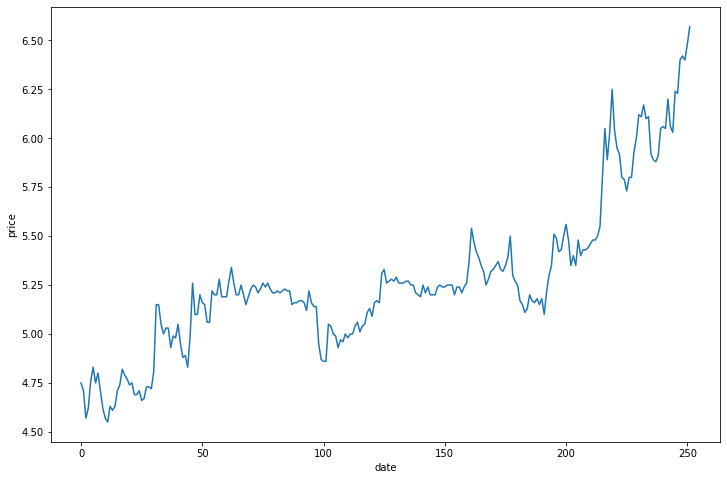

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [60]:
df['New']=df['Open']-df['Close']
max(df['New'])

0.23999977111816406

In [61]:
min(df['New'])

-0.3400001525878906

In [22]:
df['New'].idxmin(axis = 1, skipna = True)

31

In [23]:
df['New'].idxmax(axis = 1, skipna = True)

0

In [11]:
# Get the Adjusted Close Price 
df2=[]
df2 = df[['Adj Close']] 
# Take a look at the new data 
print(df2.head())

   Adj Close
0   4.686027
1   4.646565
2   4.508451
3   4.557777
4   4.695892


In [24]:
# A variable for predicting 'n' days out into the future
# last 30 days will be empty NaN
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df2['Prediction'] = df2[['Adj Close']].shift(-forecast_out)
#print the new data set
print(df2.head())

   Adj Close  Prediction
0   4.686027    4.745219
1   4.646565    5.080640
2   4.508451    5.080640
3   4.557777    4.981986
4   4.695892    4.932660


In [28]:
#len(X)
# 252 data
# I want to use 2036 data to train our linear regression
# the last 60 are reserved for validation 30 will be used as predictors, and the last 30 will be used as response
X = np.array(df2.drop(['Prediction'],1))
X_v1=X[0:192]
len(X_v1)
X_v1[0:10]

array([[4.68602657],
       [4.64656544],
       [4.50845098],
       [4.5577774 ],
       [4.69589233],
       [4.76494932],
       [4.68602657],
       [4.73535347],
       [4.64656544],
       [4.5577774 ]])

In [29]:
# response for training
y_v1 = np.array(df2['Prediction'])
# Get all of the y values except the last '30' rows
y_v1 = y_v1[:-60]
len(y_v1)
x_train, x_test, y_train, y_test = train_test_split(X_v1, y_v1, test_size=0.2)
y_v1[0:10]

array([4.74521875, 5.08063984, 5.08063984, 4.98198605, 4.93265963,
       4.96225548, 4.96225548, 4.86360264, 4.92279434, 4.91292906])

In [30]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df2['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)
len(y)

[4.74521875 5.08063984 5.08063984 4.98198605 4.93265963 4.96225548
 4.96225548 4.86360264 4.92279434 4.91292906 4.98198605 4.88333321
 4.81427622 4.82414103 4.76494932 4.92279434 5.18915796 5.03131294
 5.03131294 5.12996578 5.09050417 5.08063984 4.99185133 4.99185133
 5.14969635 5.12996578 5.12996578 5.20888901 5.1201005  5.1201005
 5.1201005  5.19902325 5.26808071 5.20768738 5.14828348 5.14828348
 5.19778633 5.14828348 5.09878111 5.13838291 5.17798519 5.19778633
 5.18788576 5.15818405 5.17798519 5.20768738 5.18788576 5.20768738
 5.17798519 5.15818405 5.15818405 5.16808462 5.15818405 5.16808462
 5.17798519 5.16808462 5.16808462 5.09878111 5.10868168 5.10868168
 5.11858225 5.11858225 5.10868168 5.0690794  5.16808462 5.10868168
 5.08888054 5.08888054 4.90077019 4.8215661  4.81166553 4.81166553
 4.99977541 4.98987484 4.95027304 4.94037247 4.88096905 4.92057133
 4.91067123 4.95027304 4.93047237 4.95027304 4.95027304 4.98987484
 5.00967598 4.96017361 4.98987484 4.99977541 5.05917883 5.07897

222

In [31]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_new=lr.predict(X[192:222])

In [48]:
print('Predicted last 30days')
print(y_new)

Predicted last 30days
[5.24661189 5.27434918 5.29168471 5.34715911 5.34022466 5.31595485
 5.31942182 5.34369197 5.3644948  5.33675769 5.29168471 5.30902057
 5.29168471 5.33675769 5.30902057 5.31942182 5.31942182 5.32288913
 5.32982341 5.33675769 5.33675769 5.34369197 5.36102766 5.44770632
 5.53438497 5.47891041 5.52745069 5.60372776 5.53091766 5.49971324]


In [50]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.2945911152677956


In [51]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df2.drop(['Prediction'],1))[-forecast_out:]
print('Actual last 30 days to predict')
print(x_forecast)

Actual last 30 days to predict
[[5.90292311]
 [5.78326941]
 [5.77329779]
 [5.71347094]
 [5.78326941]
 [5.78326941]
 [5.91289377]
 [5.98269224]
 [6.10234594]
 [6.09237528]
 [6.15220213]
 [6.08240366]
 [6.09237528]
 [5.90292311]
 [5.8730092 ]
 [5.86303854]
 [5.89295149]
 [6.03254843]
 [6.04251909]
 [6.03254843]
 [6.18211508]
 [6.04251909]
 [6.01260614]
 [6.22199965]
 [6.23000002]
 [6.4000001 ]
 [6.42000008]
 [6.4000001 ]
 [6.48000002]
 [6.57000017]]


Text(0, 0.5, 'Price')

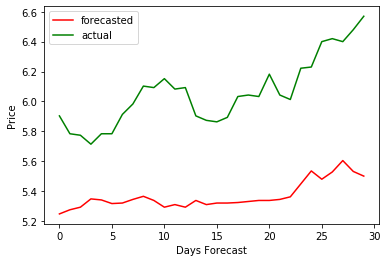

In [52]:
plt.plot(y_new, 'r')
plt.plot(x_forecast, 'g')
plt.legend(['forecasted','actual'])
plt.xlabel('Days Forecast')
plt.ylabel('Price')

In [ ]:
#https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/
    
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()